In [1]:
data_type = 'avg1'

In [2]:
import h5py
import numpy as np

file_name = 'FMD_WF_'+str(data_type)+'_train.hdf5'    
f = h5py.File(file_name,'r')
clean = f["clean_images"][:]
noisy = f["noisy_images"][:]
f.close()

In [3]:
print (clean.shape, noisy.shape)

(2850, 512, 512) (2850, 512, 512)


In [4]:
import random
def crop_random_patch(clean, noisy, size, num_patches):
    
    rand = random.randrange(1,100000)
    
    clean_patches = image.extract_patches_2d(clean, (size, size), num_patches, rand)
    noisy_patches = image.extract_patches_2d(noisy, (size, size), num_patches, rand)
    
    clean_img = clean_patches.copy()
    noisy_img = noisy_patches.copy()
    
    return clean_img, noisy_img

In [5]:
max_num_patches = 20500
patches_per_image = max_num_patches // (clean.shape[0]) + 1
global_size = 120

print ('max_num_patches : ', max_num_patches)
print ('patches_per_image : ', patches_per_image)

max_num_patches :  20500
patches_per_image :  8


In [6]:
from sklearn.feature_extraction import image
from scipy.ndimage import imread

zi_patch = np.zeros((patches_per_image * (clean.shape[0]),global_size,global_size), dtype = np.float32)
xi_patch = np.zeros((patches_per_image * (noisy.shape[0]),global_size,global_size), dtype = np.float32)

patch_idx = 0

for img_idx in range(noisy.shape[0]):
    
    clean_img = clean[img_idx]
    noisy_img = noisy[img_idx]
    
    xi, zi = crop_random_patch(clean_img, noisy_img, global_size,patches_per_image)
    
    zi_patch[patch_idx:patch_idx+xi.shape[0]] = zi
    xi_patch[patch_idx:patch_idx+xi.shape[0]] = xi

    patch_idx += xi.shape[0]
    
    if patch_idx >= max_num_patches:
        print ('len of zi_patch, xi_patch : ', patch_idx)
        break

len of zi_patch, xi_patch :  20504


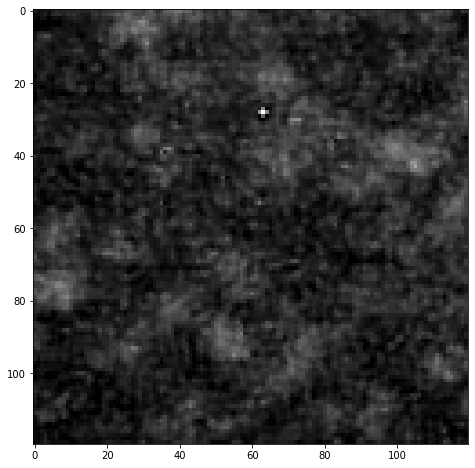

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,8])
plt.imshow(zi_patch[max_num_patches-1], cmap='gray')
plt.show()

In [10]:
file_name = 'G2G_train_120x120_FMD_WF_'+str(data_type)+'.hdf5'
# file_name = 'G2G_dataset_96x96_RealFM_WF_z_i_lambda42.hdf5'
f = h5py.File(file_name, "w")
f.create_dataset('clean_patches', data=np.array(xi_patch[:max_num_patches]))
f.create_dataset('noisy_patches', data=np.array(zi_patch[:max_num_patches]))
f.close()